## Initialize Network

In [ ]:
from random import random
from random import seed
seed(1)
def initialize_network(n_inputs, n_hidden, n_outputs):
 network = list()
 hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
 network.append(hidden_layer)
 output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
 network.append(output_layer)
 return network
## Testing
network = initialize_network(2,1,2)
for layer in network:
  print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


## Forward Propagate
1. Activation Function

In [ ]:
def activate(weights, input):
  activation = weights[-1]
  for i in range(len(weights)-1):
    activation += weights[i] * input[i]
  return activation

2. Neuron Transfer

In [ ]:
from math import exp
def transfer(activation):
  return 1.0 / (1.0 + exp(-activation))

3. Forward Propogation

In [ ]:
def forward_propagate(network, row):
 inputs = row
 for layer in network:
  new_inputs = []
  for neuron in layer:
    activation = activate(neuron['weights'], inputs)
    neuron['output'] = transfer(activation)
    new_inputs.append(neuron['output'])
  inputs = new_inputs
 return inputs

- **Test Forwrad Propogation**

In [ ]:
row = [1,0, None]
output = forward_propagate(network, row)
print(output)

[0.6629970129852887, 0.7253160725279748]


###  Back Propagate Error
1. Transfer Derivative

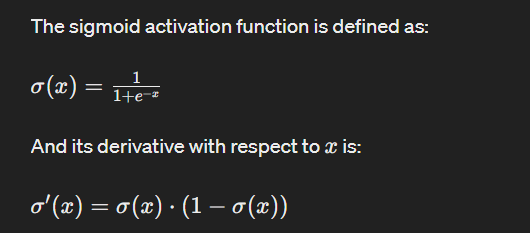

In [ ]:
def transfer_derivative(output):
 return output * (1.0 - output)

2. Error Backpropagation

In [ ]:
def backward_propagate_error(network, expected):
 for i in reversed(range(len(network))):
  layer = network[i]
  errors = list()
  if i != len(network)-1:
    for j in range(len(layer)):
      error = 0.0
      for neuron in network[i + 1]:
        error += (neuron['weights'][j] * neuron['delta'])
        errors.append(error)
  else:
    for j in range(len(layer)):
      neuron = layer[j]
      errors.append(neuron['output'] - expected[j])
  for j in range(len(layer)):
    neuron = layer[j]
    neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [ ]:
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
 [{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
 print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': 0.007668854370284511}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': 0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': -0.0771723774346327}]


### Train Network
1. Update Weights

In [ ]:
def update_weights(network, row, l_rate):
 for i in range(len(network)):
  inputs = row[:-1]
  if i != 0:
    inputs = [neuron['output'] for neuron in network[i - 1]]
    for neuron in network[i]:
      for j in range(len(inputs)):
        neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
      neuron['weights'][-1] -= l_rate * neuron['delta']

2. Train Network

In [ ]:
def train_network(network, train, l_rate, n_epoch, n_outputs):
 for epoch in range(n_epoch):
  sum_error = 0
  for row in train:
      outputs = forward_propagate(network, row)
      expected = [0 for i in range(n_outputs)]
      expected[row[-1]] = 1
      sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
      backward_propagate_error(network, expected)
      update_weights(network, row, l_rate)
  print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [18]:
dataset = [[2.7810836,2.550537003,0],
 [1.465489372,2.362125076,0],
 [3.396561688,4.400293529,0],
 [1.38807019,1.850220317,0],
 [3.06407232,3.005305973,0],
 [7.627531214,2.759262235,1],
 [5.332441248,2.088626775,1],
 [6.922596716,1.77106367,1],
 [8.675418651,-0.242068655,1],
 [7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
print(f"n_inputs: {n_inputs}, n_outputs: {n_outputs}")
network = initialize_network(n_inputs, 2, n_outputs)
print(f"Network: {network}")
train_network(network, dataset, 0.01, 200000, n_outputs)
for layer in network:
 print(layer)

Streaming output truncated to the last 5000 lines.
>epoch=195002, lrate=0.010, error=1.581
>epoch=195003, lrate=0.010, error=1.581
>epoch=195004, lrate=0.010, error=1.581
>epoch=195005, lrate=0.010, error=1.581
>epoch=195006, lrate=0.010, error=1.581
>epoch=195007, lrate=0.010, error=1.581
>epoch=195008, lrate=0.010, error=1.581
>epoch=195009, lrate=0.010, error=1.581
>epoch=195010, lrate=0.010, error=1.581
>epoch=195011, lrate=0.010, error=1.581
>epoch=195012, lrate=0.010, error=1.581
>epoch=195013, lrate=0.010, error=1.581
>epoch=195014, lrate=0.010, error=1.581
>epoch=195015, lrate=0.010, error=1.581
>epoch=195016, lrate=0.010, error=1.581
>epoch=195017, lrate=0.010, error=1.581
>epoch=195018, lrate=0.010, error=1.581
>epoch=195019, lrate=0.010, error=1.581
>epoch=195020, lrate=0.010, error=1.581
>epoch=195021, lrate=0.010, error=1.581
>epoch=195022, lrate=0.010, error=1.581
>epoch=195023, lrate=0.010, error=1.581
>epoch=195024, lrate=0.010, error=1.581
>epoch=195025, lrate=0.010, e